In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import spearmanr
from numpy.random import randn
from numpy.random import seed

from mlxtend import plotting
from sklearn.metrics import accuracy_score

import seaborn as sns

from sklearn.tree import (
    DecisionTreeRegressor,
    plot_tree
)
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

# Data preperation

In [2]:
df = pd.read_csv('insurance.csv')
# df.describe()
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1001,24,male,32.700,0,yes,southwest,34472.84100
91,53,female,24.795,1,no,northwest,10942.13205
847,23,male,50.380,1,no,southeast,2438.05520
1047,22,male,52.580,1,yes,southeast,44501.39820
144,30,male,28.690,3,yes,northwest,20745.98910
1288,20,male,39.400,2,yes,southwest,38344.56600
21,30,female,32.400,1,no,southwest,4149.73600
470,27,male,32.670,0,no,southeast,2497.03830
580,59,male,25.460,1,no,northeast,12913.99240
468,28,female,24.320,1,no,northeast,23288.92840


### category encoding
- sex
- region
- smoker

In [3]:
ohe_s = OneHotEncoder()
sex = ohe_s.fit_transform(df[['sex']])
sex=sex.toarray()
print(sex)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [4]:
ohe_r = OneHotEncoder()
regions = ohe_r.fit_transform(df[['region']])
regions=regions.toarray()
print(regions)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [5]:
df[ohe_s.categories_[0][0]] = sex[:,0]
df[ohe_s.categories_[0][1]] = sex[:,1]
df[ohe_r.categories_[0][0]] = regions[:,0]
df[ohe_r.categories_[0][1]] = regions[:,1]
df[ohe_r.categories_[0][2]] = regions[:,2]
df[ohe_r.categories_[0][3]] = regions[:,3]


In [6]:
df['is_smoker'] = df['smoker'].apply(lambda x: 1 if x=='yes' else 0)
df

,age,sex,bmi,children,smoker,region,charges,female,male,northeast,northwest,southeast,southwest,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,1
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,0


In [7]:
df_new = df
df_new=df_new.drop(columns=['sex', 'smoker','region'])
df_new

,age,bmi,children,charges,female,male,northeast,northwest,southeast,southwest,is_smoker
0,19,27.900,0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,1
1,18,33.770,1,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,0
2,28,33.000,3,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,0
1335,18,36.850,0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,0
1336,21,25.800,0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,0


## Model

In [8]:
target=df_new.pop("charges").values.ravel()
target=pd.Series(target,name='charges')
data = df_new

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.33, random_state=2)
regr = RandomForestRegressor(random_state=2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Train score:', round(regr.score(X_train, y_train),4),
'\nTest score:', round(regr.score(X_test, y_test),4),
'\nCross-validation: ', round(cross_val_score(regr, X_train, y_train, cv=5).mean(),4))


Train score: 0.9748 
Test score: 0.8653 
Cross-validation:  0.8177


## Parameter testing

### max_leaf_nodes-test

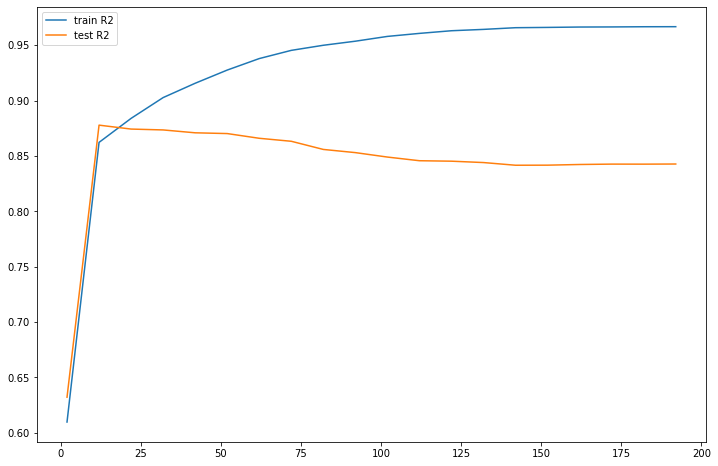

In [10]:
max_leaf_nodes = list(range(2, 200, 10))
train_r2 = []
test_r2 = []

for param in max_leaf_nodes:
    model = RandomForestRegressor(n_estimators=10, max_leaf_nodes=param, random_state=1).fit(X_train, y_train)
    train_r2.append(model.score(X_train, y_train))
    test_r2.append(model.score(X_test, y_test))
    
plt.figure(figsize = (12, 8))
plt.plot(max_leaf_nodes, train_r2, label = 'train R2')
plt.plot(max_leaf_nodes, test_r2, label = 'test R2')
plt.legend()
plt.show()  

### max_leaf_nodes --->150

### Best parameters search

Exmple of GridSearch procedure 

In [11]:
params = {'n_estimators': range(1,20,1),"min_samples_split": range(2, 10, 1),
          "min_samples_leaf": range(1, 10, 1)}
forest = RandomForestRegressor(max_leaf_nodes=150)

scorer = make_scorer(f1_score) #scoring object

rf_regressor_search = GridSearchCV(forest, params, cv=5,n_jobs=-1)
rf_regressor_search.fit(X_train, y_train)
rf_regressor_search.best_params_

{'min_samples_leaf': 9, 'min_samples_split': 9, 'n_estimators': 17}

In [12]:
forest = RandomForestRegressor(max_leaf_nodes=150,**rf_regressor_search.best_params_)
forest.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=150, min_samples_leaf=9,
                      min_samples_split=9, n_estimators=17)

In [13]:
print('Train score:', round(forest.score(X_train, y_train),4),
'\nTest score:', round(forest.score(X_test, y_test),4),
'\nCross-validation: ', round(cross_val_score(regr, X_train, y_train, cv=5).mean(),4))

Train score: 0.8846 
Test score: 0.879 
Cross-validation:  0.8177


After following case matrix (which took ~6h):
params = {'n_estimators': range(1,80,1),"min_samples_split": range(2, 100, 1),
          "min_samples_leaf": range(1, 100, 1)}

The best parameters are:
{'min_samples_leaf': 11, 'min_samples_split': 5, 'n_estimators': 19}




In [14]:
best_fortest=RandomForestRegressor(max_leaf_nodes=150,min_samples_leaf=11, min_samples_split=5, n_estimators=19)
best_fortest.fit(X_train, y_train)
y_pred = best_fortest.predict(X_test)

In [15]:
print('Train score:', round(best_fortest.score(X_train, y_train),4),
'\nTest score:', round(best_fortest.score(X_test, y_test),4),
'\nCross-validation: ', round(cross_val_score(best_fortest, X_train, y_train, cv=5).mean(),4))

Train score: 0.879 
Test score: 0.8835 
Cross-validation:  0.8402


In [16]:
from sklearn.inspection import PartialDependenceDisplay

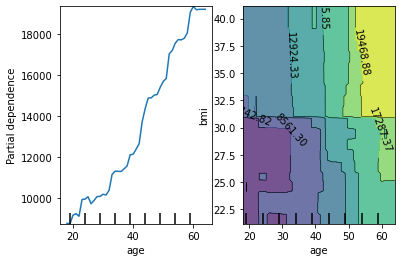

In [17]:
disp1 = PartialDependenceDisplay.from_estimator(best_fortest, data,[0, (0, 1)])

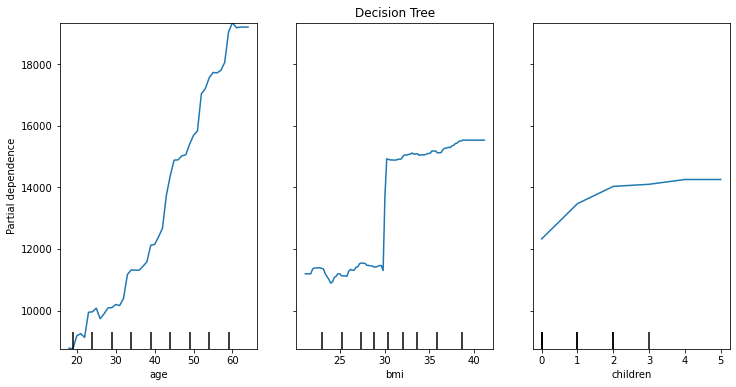

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(best_fortest, data, ["age", "bmi", 'children'], ax=ax)

## standardisation

In [19]:
df_std=df_new

In [20]:
std_col = ['age','bmi','children']
std_scale = preprocessing.StandardScaler().fit(df_new[std_col])
df_std1=std_scale.transform(df[std_col])

In [21]:
df_std1=pd.DataFrame(df_std1,columns=std_col)

In [22]:
df_std[std_col]=df_std1[std_col]
df_std.describe()

,age,bmi,children,female,male,northeast,northwest,southeast,southwest,is_smoker
count,1.338000e+03,1.338000e+03,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,-1.853691e-16,-1.869041e-16,2.721623e-17,0.494768,0.505232,0.242152,0.242900,0.272048,0.242900,0.204783
std,1.000374e+00,1.000374e+00,1.000374e+00,0.500160,0.500160,0.428546,0.428995,0.445181,0.428995,0.403694
min,-1.509965e+00,-2.412011e+00,-9.086137e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.396738e-01,6.611572e-01,7.510793e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.765289e+00,3.685522e+00,3.240619e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
data1 = df_std
target_col='charges'
target1=pd.Series(target,name=target_col)
# best_p=[max_leaf_nodes=150,min_samples_leaf=11, min_samples_split=5, n_estimators=19,random_state=2]
X_train, X_test, y_train, y_test = train_test_split(data1, target1,test_size=0.33, random_state=2)
RF_std = RandomForestRegressor(max_leaf_nodes=150,min_samples_leaf=11, min_samples_split=5, n_estimators=19,random_state=2)
RF_std.fit(X_train, y_train)
y_pred = RF_std.predict(X_test)

print('Train score:', round(RF_std.score(X_train, y_train),4),
'\nTest score:', round(RF_std.score(X_test, y_test),4),
'\nCross-validation: ', round(cross_val_score(RF_std, X_train, y_train, cv=5).mean(),4))

Train score: 0.8806 
Test score: 0.8798 
Cross-validation:  0.8391


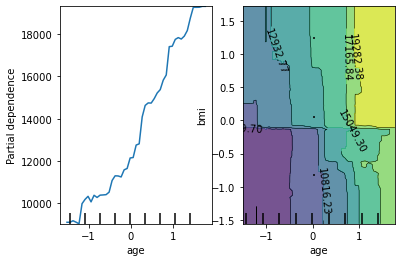

In [24]:
disp1 = PartialDependenceDisplay.from_estimator(RF_std, data1,[0, (0, 1)])

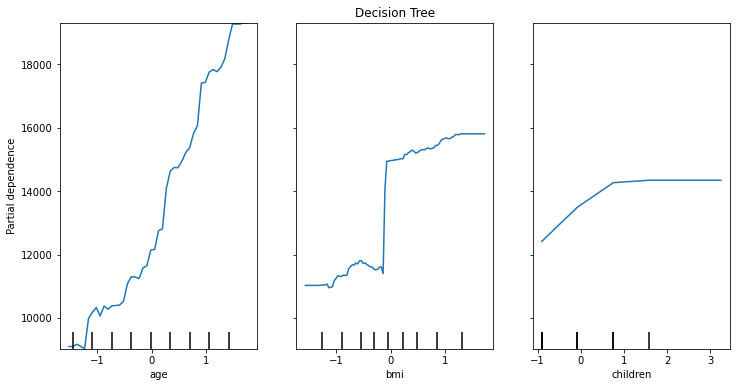

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(RF_std, data1, ["age", "bmi",'children'], ax=ax)